## Importações

In [1]:
import pandas as pd
from math import floor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import mstats

## Extraindo a Base

In [2]:
df_original = pd.read_csv("..\dados\ObesityDataSet_raw_and_data_sinthetic.csv")

df = df_original.copy()

display(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Ajeitando a Base

Para começar, eu verifico as variações dos valores de cada coluna.

In [3]:
for i in df:
    print(i)
    print(df[i].unique())
    print("-=-=-=-=--=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-")

Gender
['Female' 'Male']
-=-=-=-=--=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-
Age
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
-=-=-=-=--=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-
Height
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
-=-=-=-=--=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-
Weight
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
-=-=-=-=--=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-
family_history_with_overweight
['yes' 'no']
-=-=-=-=--=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-
FAVC
['no' 'yes']
-=-=-=-=--=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-
FCVC
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.36291

Verifico se a informação de que a base de dados não possui dados nulos é correta.

In [4]:
df.isnull().values.any()

False

Gráfico de linha feito antes das modificações na base. O gráfico tem o intuito de mostrar quantos valores únicos as colunas qualitativas tinham antes e depois de ajustar a base.

In [5]:
lista_cont = []
for i in df:
    lista_cont.append(len(df[i].unique()))
lista_cont

fig = px.line( x= df.columns.to_list(), y=lista_cont)

fig.update
fig.show()

É possível perceber que as seguintes colunas: [AGE, FCVC, NCP, CH2O, FAF, TUE] não estão de acordo com a descrição original da base. Portanto, irei alterar seus valores para que se adequem ao padrão.

Os dados da coluna 'Age' estavam no formato float e continham valores decimais. Arredondamos os valores para baixo e os transformamos em inteiros.

In [6]:
for k,v in enumerate(df['Age']):
    df['Age'][k] = int(floor(v))

df['Age'] = df['Age'].astype(int)
print(df['Age'].unique())


C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_3364\662505242.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 50 43 46 47]


In [7]:
print(list(df['FAF'].unique()))

[0.0, 3.0, 2.0, 1.0, 0.319156, 1.541072, 1.978631, 0.10032, 1.586525, 1.399183, 1.680844, 2.206738, 1.31817, 0.902095, 0.600817, 0.119643, 0.345684, 1.679935, 2.539762, 0.196152, 1.596576, 0.754646, 0.42777, 0.545931, 1.303976, 1.488843, 1.228136, 1.661556, 0.658894, 0.544784, 0.819682, 0.194745, 1.903182, 1.067817, 1.63581, 2.870127, 0.619533, 0.821977, 1.44287, 0.107078, 0.288032, 1.926592, 0.99295, 1.252472, 0.520408, 0.281734, 2.595128, 2.240714, 2.458237, 0.139808, 0.651412, 1.522399, 1.37467, 0.260079, 2.784471, 2.349495, 2.038653, 0.866045, 0.630944, 2.20208, 0.069802, 0.028202, 0.618913, 0.684739, 2.306844, 0.144627, 2.011519, 0.520407, 1.070331, 1.60195, 1.258504, 1.235675, 0.227985, 1.838881, 0.833976, 1.94907, 0.945093, 1.967234, 0.995735, 1.295697, 1.548953, 1.699592, 0.480614, 0.127425, 2.460238, 0.783676, 0.174692, 0.548991, 1.162519, 2.830911, 1.683957, 1.877369, 2.511157, 0.373186, 2.075293, 0.027433, 0.769726, 0.201136, 1.696294, 2.008256, 0.794402, 1.098862, 1.612248,

Arredondamento das demais colunas.

In [8]:
df['FCVC'] = round(df['FCVC']).astype(int)
df['NCP'] = round(df['NCP']).astype(int)
df['CH2O'] = round(df['CH2O']).astype(int)
df['FAF'] = round(df['FAF']).astype(int)
df['TUE'] = round(df['TUE']).astype(int)

print(df['FCVC'].unique())
print(df['NCP'].unique())
print(df['CH2O'].unique())
print(df['FAF'].unique())
print(df['TUE'].unique())


[2 3 1]
[3 1 4 2]
[2 3 1]
[0 3 2 1]
[1 0 2]


In [9]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


Gráfico de linha feito depois das modificações na base.

In [10]:
lista_cont = []
for i in df:
    lista_cont.append(len(df[i].unique()))
lista_cont

fig = px.line( x= df.columns.to_list(), y=lista_cont)

fig.update
fig.show()

## Dados Sobre a Base

#### Informações Sobre os Dados Quantitativos

In [11]:
df_quantitativo = df[['Age','Height', 'Weight' ]]

Média

In [12]:
for i in df_quantitativo:
    print(df_quantitativo[i].mean())

23.972524869729988
1.7016773533870204
86.58605812648035


Mediana

In [13]:
for i in df_quantitativo:
    print(df_quantitativo[i].median())


22.0
1.700499
83.0


Moda

In [14]:
for i in df_quantitativo:
    print(df_quantitativo[i].mode())


0    21
Name: Age, dtype: int32
0    1.7
Name: Height, dtype: float64
0    80.0
Name: Weight, dtype: float64


Desvio Padrão

In [15]:
for i in df_quantitativo:
    print(df_quantitativo[i].std())

6.3086642611136226
0.09330481986792007
26.1911717452047


#### Informações Sobre os Dados Qualitativos

In [16]:
df_qualitativo = df[['Gender',"family_history_with_overweight",	"FAVC",	"FCVC",	"NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS","NObeyesdad"]]

Moda

In [17]:
for i in df_qualitativo:
    print(i)
    print(df[i].mode())

Gender
0    Male
Name: Gender, dtype: object
family_history_with_overweight
0    yes
Name: family_history_with_overweight, dtype: object
FAVC
0    yes
Name: FAVC, dtype: object
FCVC
0    2
Name: FCVC, dtype: int32
NCP
0    3
Name: NCP, dtype: int32
CAEC
0    Sometimes
Name: CAEC, dtype: object
SMOKE
0    no
Name: SMOKE, dtype: object
CH2O
0    2
Name: CH2O, dtype: int32
SCC
0    no
Name: SCC, dtype: object
FAF
0    1
Name: FAF, dtype: int32
TUE
0    0
Name: TUE, dtype: int32
CALC
0    Sometimes
Name: CALC, dtype: object
MTRANS
0    Public_Transportation
Name: MTRANS, dtype: object
NObeyesdad
0    Obesity_Type_I
Name: NObeyesdad, dtype: object


## Análise dos Dados

### Plotagens

##### Box Plots dos dados Quantitativos

In [18]:
fig = px.box(df, y="Age", points= 'all')

fig.show()

In [19]:
fig = px.box(df, y="Height", points= 'all')

fig.show()

In [20]:
fig = px.box(df, y="Weight", points= 'all')

fig.show()

Ao plotarmos os boxplots, podemos concluir que, nos dados quantitativos, os valores de peso e altura estão bem distribuídos pelo dataset. Porém, ao analisar o boxplot de idade, é possível perceber que há uma grande concentração de dados na faixa de 19 (primeiro quartil) a 26 anos (terceiro quartil).

##### Boxplots dos Dados Quantitativos Relacionados a Cada Classe do "NObeyesdad"

In [21]:
for coluna in ["Age","Height", "Weight"]:
    fig = px.box(df, y=coluna, points= 'all', color='NObeyesdad')
    fig.show()

Nos boxplots dos dados quantitativos relacionados a cada classe do "NObeyesdad", é notável uma certa tendência a pesos prejudiciais entre pessoas mais jovens, devido ao fato de que os dados de indivíduos com obesidade tipo 3 e aqueles com peso insuficiente apresentam pouca variação de idade, concentrando-se principalmente na faixa dos 20 anos. No entanto, é importante lembrar que a maior parte dos dados do dataset se concentra nessa faixa etária.
Fora isso, os dados de altura não demonstram uma relação significativa com as classes do "NObeyesdad", apresentando grande variação em todos os casos. Já os dados de peso, como era de se esperar, mostram que, quanto maior o peso, maior a tendência à obesidade.

#### Frequência das Categorias Dentro dos Dados Qualitativos. 

In [22]:
df_qualitativo

,Gender,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [23]:
for k,i in enumerate(df_qualitativo):
    fig = px.histogram(df_qualitativo[i],title=i)
    fig.show()    

Gender (Gênero): Dados bem distribuídos.

family_history_with_overweight (Histórico familiar de sobrepeso): Maior concentração dos dados na categoria "yes".

FAVC (Consumo frequente de alimentos com alto teor calórico): Maior concentração dos dados na categoria "yes".

FCVC (Frequência de consumo de vegetais): Dados mais concentrados nas categorias 2 e 3.

NCP (Número de refeições principais): Maior concentração dos dados na categoria 3.

CAEC (Consumo de alimentos entre as refeições): Maior concentração dos dados na categoria "Sometimes".

Smoke (Fumar): Maior concentração dos dados na categoria "no".

CH20 (Consumo diário de água): Maior concentração dos dados na categoria 2.

SCC (Acompanhamento da ingestão calórica): Maior concentração dos dados na categoria "no".

FAF (Frequência de atividade física): Dados bem distribuídos, com exceção da categoria 3.

TUE (Tempo usando dispositivos eletrônicos): Dados mais concentrados nas categorias 1 e 2.

CALC (Consumo de álcool): Maior concentração dos dados na categoria "Sometimes", com a categoria "Always" contendo apenas 1 dado entre os 2111.

MTRANS (Meio de transporte mais utilizado): Maior concentração dos dados na categoria "Public_Transportation", com as categorias "Motorbike" e "Bike" contendo apenas 11 e 7 dados, respectivamente, 
entre os 2111.

NObeyesdad (Nível de obesidade de acordo com o índice de massa corporal): Dados bem distribuídos.

## Outliers

Como observado ao longo da análise, a base possui em sua maioria dados qualitativos (14 colunas de 17). Além disso, 5 dessas colunas são dados binários, o que impossibilita o tratamento de outliers nesses casos, pois, neste contexto, o conceito de "outlier" é menos aplicável, já que não há variação contínua, e cada valor possui um significado distinto e relevante para a previsão.

Além disso, como estamos tratando de níveis de obesidade, valores extremos, como por exemplo em peso, nos ajudam a identificar mais facilmente a sua classe. Assim, ao remover outliers, pode-se introduzir um viés no modelo, tornando-o menos capaz de lidar com casos que se afastam do padrão.

Podemos comprovar isso com os seguintes gráficos:

In [24]:
for coluna in ["Age", "Height", "Weight"]:
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f'{coluna} - Sem Segmentação', f'{coluna} - Por Classe de NObeyesdad'))

    box_individual = go.Box(y=df[coluna], name=coluna, boxpoints='all', marker_color='blue')
    fig.add_trace(box_individual, row=1, col=1)

    box_categorizado = px.scatter(df, y=coluna, x='NObeyesdad',color='NObeyesdad')

    for trace in box_categorizado.data:
        fig.add_trace(trace, row=1, col=2)

    fig.update_layout(title_text=f'Comparação do Boxplot {coluna} Com a Distribuição das Classes Resposta', showlegend=False)
    fig.show()

Nestes gráficos, podemos ver que os dados estão bem distribuídos e que os valores extremos de peso têm grande importância para caracterizar as classes 'Insufficient_Weight' e 'Obesity_Type_III'.

O único dado que pode realmente introduzir um certo viés são as maiores idades correlacionadas às classes 'Normal_Weight','Overweight_Level_I' e 'Overweight_Level_II', que pode ser resolvido de algumas maneiras.

### 1. Limitação (Capping) - Limitando valores a 5º e 95º percentil

Capping é o processo de converter outliers em dados que você não considera como outliers, simplesmente decidindo um valor limite, normalmente estabelecidos em um intervalo percentílico, no nosso caso entre o 5º e o 95º percentil (comummente utilizado), em que os dados que estão além do limite são levados para dentro do limite.

Imagem que ilustra a explicação:

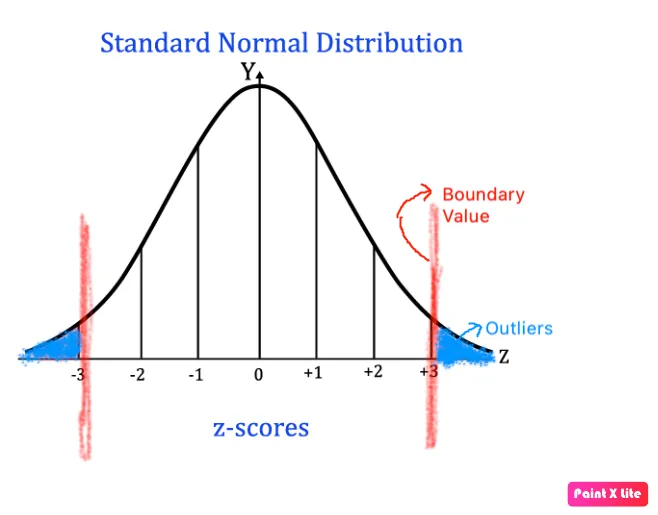

In [25]:
df_capped = df.copy()

limite_inferior, limite_superior = df['Age'].quantile([0.05, 0.95])
df_capped['Age'] = df['Age'].clip(lower=limite_inferior, upper=limite_superior)
df_capped.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight


### 2. Transformação Logarítmica


A transformação logarítmica é uma técnica utilizada para transformar os valores de um conjunto de dados em uma escala logarítmica. Essa técnica reduz a magnitude dos valores extremos, tornando-os menos impactantes na análise estatística do conjunto de dados.

Quando aplicamos a transformação logarítmica aos valores de um conjunto de dados que contém outliers, os valores extremos são reduzidos proporcionalmente ao seu grau de distância da média. Isso significa que valores extremos são “encolhidos” para valores menores na escala logarítmica, enquanto os valores próximos à média sofrem pouca ou nenhuma alteração.

In [26]:
df_log = df.copy()

df_log['Age'] = np.log(df['Age'] + 1)  # +1 para evitar log(0)
df_log.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,3.091042,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight


### 3. Transformação Por Raiz Quadrada


A transformação por raiz quadrada tem os mesmos princípios da transformação logarítmica, porém, age de forma menos drástica.

In [27]:
df_sqrt = df.copy()

df_sqrt['Age'] = np.sqrt(df['Age'])

### 4. Método IQR (Intervalo Interquartílico)

O IQR é uma técnica estatística usada para identificar outliers em um conjunto de dados. Ele se baseia nos quartis do conjunto de dados e no intervalo interquartil (IQR), que é definido como a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1).

O método IQR é mais robusto e adequado para distribuições assimétricas ou não normais, pois utiliza quartis em vez da média/desvio padrão (este caso).

Ele é o único da lista que exclui os outliers definidos por ele da base.

In [28]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_IQR = Q1 - 1.5 * IQR
upper_bound_IQR = Q3 + 1.5 * IQR

# Filtrando os dados usando IQR
df_IQR_filtered = df[(df['Age'] >= lower_bound_IQR) & (df['Age'] <= upper_bound_IQR)]

### Plotagens

In [29]:

fig = make_subplots(rows=1, cols=5, subplot_titles=('Original', 'Capping', 
                                                    'Logarítmica', 'Raiz Quadrada', 
                                                    'IQR'))

fig.add_trace(go.Box(y=df['Age'], name='Original', boxpoints='all'), row=1, col=1)
fig.add_trace(go.Box(y=df_capped['Age'], name='Capping', boxpoints='all'), row=1, col=2)
fig.add_trace(go.Box(y=df_log['Age'], name='Logarítmica', boxpoints='all'), row=1, col=3)
fig.add_trace(go.Box(y=df_sqrt['Age'], name='Raiz Quadrada', boxpoints='all'), row=1, col=4)
fig.add_trace(go.Box(y=df_IQR_filtered['Age'], boxpoints='all',name='IQR'), row=1, col=5)

fig.update_layout(title_text='Comparação dos Métodos de Tratamento de Outliers - Variável Age', showlegend=False)
fig.show()

Para termos certeza de qual é a mais eficaz, testaremos cada uma nos diferentes modelos e, em seguida, as compararemos.

### Transformando os DataFrames em .xlsx

In [30]:
df.to_excel('..\dados\df_original.xlsx', index=False)

In [31]:
df_capped.to_excel('..\dados\df_capping.xlsx', index=False)

In [32]:
df_log.to_excel('..\dados\df_log.xlsx', index=False)

In [33]:
df_sqrt.to_excel('..\dados\df_raiz.xlsx', index=False)

In [34]:
df_IQR_filtered.to_excel('..\dados\df_iqr.xlsx', index=False)